In [1]:
!nvidia-smi

Fri Aug 20 18:58:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!python --version

Python 3.7.11


In [2]:
#!pip install Cython>=0.27.3

In [1]:
!apt-get install python3.5
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.13.1
!pip install tensorflow-plot==0.2.0
!pip uninstall matplotlib -y
!pip install matplotlib==3.0.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.5 is already the newest version (3.5.10-1+bionic2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Found existing installation: matplotlib 3.0.2
Uninstalling matplotlib-3.0.2:
  Successfully uninstalled matplotlib-3.0.2
  Using cached matplotlib-3.0.2-cp37-cp37m-manylinux1_x86_64.whl (12.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which

In [4]:
import tensorflow as tf
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/data/io/')

In [5]:
import copy
import sys
sys.path.append('../../')
from libs.label_name_dict.label_dict import NAME_LABEL_MAP
from libs.configs.cfgs import DATASET_NAME
class_list = list(NAME_LABEL_MAP.keys())
print(class_list)
print(DATASET_NAME)

++--++--++--++--++--++--++--++--++--++--++--++--++--++--++--++--++--++--++--++--
The ROOT_PATH is  /content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/
['back_ground', 'roundabout', 'tennis-court', 'swimming-pool', 'storage-tank', 'soccer-ball-field', 'small-vehicle', 'ship', 'plane', 'large-vehicle', 'helicopter', 'harbor', 'ground-track-field', 'bridge', 'basketball-court', 'baseball-diamond']
DOTA


In [6]:
len(class_list)

16

In [7]:
NAME_LABEL_MAP['roundabout']

1

In [4]:
#a = tf.constant([1,1,1])

In [8]:
#tf.make_ndarray(a.op.get_attr('value'))

array([1, 1, 1], dtype=int32)

In [ ]:
#os.chdir('/content/drive/MyDrive/Colab Notebooks/MyGITs/FPN_Tensorflow_Rotation/data/io/')
#os.listdir('Data')

['P2691.txt', 'P2691.png', 'P0000.txt', 'P0000.png']

###1) Find imagery and groundtruth
###2) Loop over imagery and gt and make crops (handle lables patially on image)
###2) Determine format required for tf record

In [ ]:
# img = cv2.imread('Data/P0000.png')[:, :, ::-1]
# print(type(img))
# print(img.shape)

<class 'numpy.ndarray'>
(5502, 3875, 3)


In [ ]:
# txt_data = open('Data/P0000.txt', 'r').readlines()
# print(type(txt_data))
# txt_data[0:3]

<class 'list'>


['imagesource:GoogleEarth\n',
 'gsd:0.146343590398\n',
 '2753 2408 2861 2385 2888 2468 2805 2502 plane 0\n']

In [8]:
def format_label(txt_list,class_list):
    format_data = []
    for i in txt_list:
        if len(i.split(' ')) < 9:
            continue
        format_data.append(
            [float(xy) for xy in i.split(' ')[:8]] + [class_list.index(i.split(' ')[8].split('\n')[0])]
        )

        if i.split(' ')[8].split('\n')[0] not in class_list:
            print('warning found a new label :', i.split(' ')[8])
            exit()
    return np.array(format_data, dtype=np.int32)

In [9]:
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def clip_image(file_idx, image, boxes_all, width, height, stride_w, stride_h, writer):
    if len(boxes_all) > 0:
        shape = image.shape
        for start_h in range(0, shape[0], stride_h):
            for start_w in range(0, shape[1], stride_w):
                boxes = copy.deepcopy(boxes_all)
                box = np.zeros_like(boxes_all)
                start_h_new = start_h
                start_w_new = start_w
                if start_h + height > shape[0]:
                    start_h_new = shape[0] - height
                if start_w + width > shape[1]:
                    start_w_new = shape[1] - width
                top_left_row = max(start_h_new, 0)
                top_left_col = max(start_w_new, 0)
                bottom_right_row = min(start_h + height, shape[0])
                bottom_right_col = min(start_w + width, shape[1])

                subImage = image[top_left_row:bottom_right_row, top_left_col: bottom_right_col]

                box[:, 0] = boxes[:, 0] - top_left_col
                box[:, 2] = boxes[:, 2] - top_left_col
                box[:, 4] = boxes[:, 4] - top_left_col
                box[:, 6] = boxes[:, 6] - top_left_col

                box[:, 1] = boxes[:, 1] - top_left_row
                box[:, 3] = boxes[:, 3] - top_left_row
                box[:, 5] = boxes[:, 5] - top_left_row
                box[:, 7] = boxes[:, 7] - top_left_row
                box[:, 8] = boxes[:, 8]
                center_y = 0.25 * (box[:, 1] + box[:, 3] + box[:, 5] + box[:, 7])
                center_x = 0.25 * (box[:, 0] + box[:, 2] + box[:, 4] + box[:, 6])

                cond1 = np.intersect1d(np.where(center_y[:] >= 0)[0], np.where(center_x[:] >= 0)[0])
                cond2 = np.intersect1d(np.where(center_y[:] <= (bottom_right_row - top_left_row))[0],
                                       np.where(center_x[:] <= (bottom_right_col - top_left_col))[0])
                idx = np.intersect1d(cond1, cond2)
                #if len(idx) > 0 and (subImage.shape[0] > 5 and subImage.shape[1] > 5):
                img_name = file_idx+'_'+str(top_left_row)+'_'+str(bottom_right_row)+'_'+str(top_left_col)+'_'+str(bottom_right_col)+'.png'
                img_height = subImage.shape[0]
                img_width = subImage.shape[1]
                if subImage.shape[0] > 5 and subImage.shape[1] > 5:
                  if len(idx) > 0:
                    gtbox_label = box[idx,:]

                  #else: 
                  #  gtbox_label = np.array([])
                    print(img_name)
                    print(gtbox_label)
                    feature = tf.train.Features(feature={
                                # do not need encode() in linux
                                'img_name': _bytes_feature(img_name.encode()),
                                # 'img_name': _bytes_feature(img_name),
                                'img_height': _int64_feature(img_height),
                                'img_width': _int64_feature(img_width),
                                'img': _bytes_feature(subImage.tostring()),
                                'gtboxes_and_label': _bytes_feature(gtbox_label.tostring()),
                                'num_objects': _int64_feature(gtbox_label.shape[0])
                            })
                    example = tf.train.Example(features=feature)

                    writer.write(example.SerializeToString())

    #writer.close()

In [10]:
raw_images_dir = '/content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/data/io/Data/'
raw_label_dir = '/content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/data/io/Data/'
img_h, img_w, stride_h, stride_w = 1000, 1000, 600, 600

print('class_list', len(class_list))
images_names = [i.split('.')[0] for i in os.listdir(raw_images_dir) if 'png' in i]
labels_names = [i.split('.')[0] for i in os.listdir(raw_label_dir) if 'txt' in i]

images = []
labels = []
for i in images_names:
    if  i in labels_names:
        images.append(i+'.png')
        labels.append(i+'.txt')
    

print('find image', len(images))
print('find label', len(labels))
#save_path = os.path.join(FLAGS.save_dir, FLAGS.dataset + '_' + FLAGS.save_name + '.tfrecord')
save_path = '../tfrecord/'+str(DATASET_NAME)+'_'+'train.tfrecord'
writer = tf.python_io.TFRecordWriter(path=save_path)
for idx, img in enumerate(images):
    print(idx, 'read image', img)
    if not os.path.exists(os.path.join(raw_label_dir, img.replace('png', 'txt'))):
        continue
    img_data = cv2.imread(os.path.join(raw_images_dir, img))

    txt_data = open(os.path.join(raw_label_dir, img.replace('png', 'txt')), 'r').readlines()
    box = format_label(txt_data,class_list=class_list)
    clip_image(img.strip('.png'), img_data, box, img_w, img_h, stride_w, stride_h, writer)

writer.close()

class_list 16
find image 2
find label 2
0 read image P0000.png
P0000_0_1000_0_1000.png
[[717  76 726  78 722  95 714  90   6]
 [737  82 744  84 739 101 731  98   6]
 [658 242 648 237 657 222 667 225   6]
 [735 122 754 129 750 136 733 128   6]
 [773 137 788 144 784 151 770 144   6]
 [809 153 827 161 823 168 806 160   6]
 [696 122 705 124 697 141 691 137   6]
 [707 126 714 130 706 145 700 141   6]
 [711 140 718 141 712 157 706 154   6]
 [924 113 926 106 945 115 942 122   6]
 [935  95 939  88 955  97 950 104   6]
 [856 282 864 286 856 303 849 298   6]
 [640 310 631 304 639 290 646 293   6]
 [612 341 607 336 613 324 621 329   6]
 [628 303 623 300 628 287 636 290   6]
 [791 349 796 351 789 367 785 363   6]
 [799 354 805 357 799 370 793 368   6]
 [823 361 830 364 823 376 817 372   6]]
P0000_0_1000_600_1600.png
[[117  76 126  78 122  95 114  90   6]
 [137  82 144  84 139 101 131  98   6]
 [ 58 242  48 237  57 222  67 225   6]
 [135 122 154 129 150 136 133 128   6]
 [173 137 188 144 184 151 17

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


P0000_600_1600_2875_3875.png
[[681 608 691 610 685 633 675 628   9]
 [123 317  15 274  62 166 168 213   8]
 [690 670 727 662 733 676 696 685   9]
 [723 616 734 619 722 650 710 646   9]
 [707 608 719 614 706 643 695 635   9]
 [655 604 662 606 654 636 646 630   9]
 [665 610 675 615 668 640 659 636   9]]
P0000_600_1600_2875_3875.png
[[681 608 691 610 685 633 675 628   9]
 [123 317  15 274  62 166 168 213   8]
 [690 670 727 662 733 676 696 685   9]
 [723 616 734 619 722 650 710 646   9]
 [707 608 719 614 706 643 695 635   9]
 [655 604 662 606 654 636 646 630   9]
 [665 610 675 615 668 640 659 636   9]]
P0000_1200_2200_0_1000.png
[[630 474 628 466 640 454 644 466   6]
 [636 513 633 506 646 498 650 506   6]
 [624 492 620 484 634 475 637 482   6]
 [425 655 424 647 441 641 442 649   6]
 [477 652 474 646 492 636 496 644   6]
 [384 684 383 678 396 674 398 681   6]
 [402 679 399 672 416 666 418 674   6]
 [319 357 327 360 318 376 310 373   6]
 [344 365 351 369 345 384 338 381   6]
 [ 42 645  44 63

In [6]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/libs/box_utils/cython_utils') 
!python setup.py build_ext --inplace -f

running build_ext
cythoning bbox.pyx to bbox.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/libs/box_utils/cython_utils/bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning nms.pyx to nms.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/libs/box_utils/cython_utils/nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'cython_bbox' extension
creating build
creating build/temp.linux-x86_64-3.7
{'gcc': ['-Wno-cpp', '-Wno-unused-function']}
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall 

In [7]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/libs/box_utils')
!python setup.py build_ext --inplace -f

running build_ext
cythoning rbbox_overlaps.pyx to rbbox_overlaps.cpp
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/libs/box_utils/rbbox_overlaps.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning rotate_polygon_nms.pyx to rotate_polygon_nms.cpp
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/libs/box_utils/rotate_polygon_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning iou_cpu.pyx to iou_cpu.cpp
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 f

In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/MyGITs/FPN_Tensorflow_Rotation/tools')

In [3]:
!ls

multi_gpu_train.py  test_dota_ms.py  test_dota.py  willywonka.log


In [4]:
!python multi_gpu_train.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [7]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/MyGITs/FPN_Tensorflow_Rotation/data/tfrecord')

FileNotFoundError: ignored

In [11]:
names = ['x0','y0','x1','y1','x2','y2','x3','y3','class','difficulty']
df = pd.read_csv('Data/P0000.txt',delimiter=' ',skiprows=2,header=None,names=names)
df

FileNotFoundError: ignored

In [ ]:
for index,row in df.iterrows():
  print(row)

x0             2753
y0             2408
x1             2861
y1             2385
x2             2888
y2             2468
x3             2805
y3             2502
class         plane
difficulty        0
Name: 0, dtype: object
x0                     3445
y0                     3391
x1                     3484
y1                     3409
x2                     3478
y2                     3422
x3                     3437
y3                     3402
class         large-vehicle
difficulty                0
Name: 1, dtype: object
x0                     3185
y0                     4158
x1                     3195
y1                     4161
x2                     3175
y2                     4204
x3                     3164
y3                     4199
class         large-vehicle
difficulty                0
Name: 2, dtype: object
x0                     2870
y0                     4250
x1                     2916
y1                     4268
x2                     2912
y2                     4283
x3 

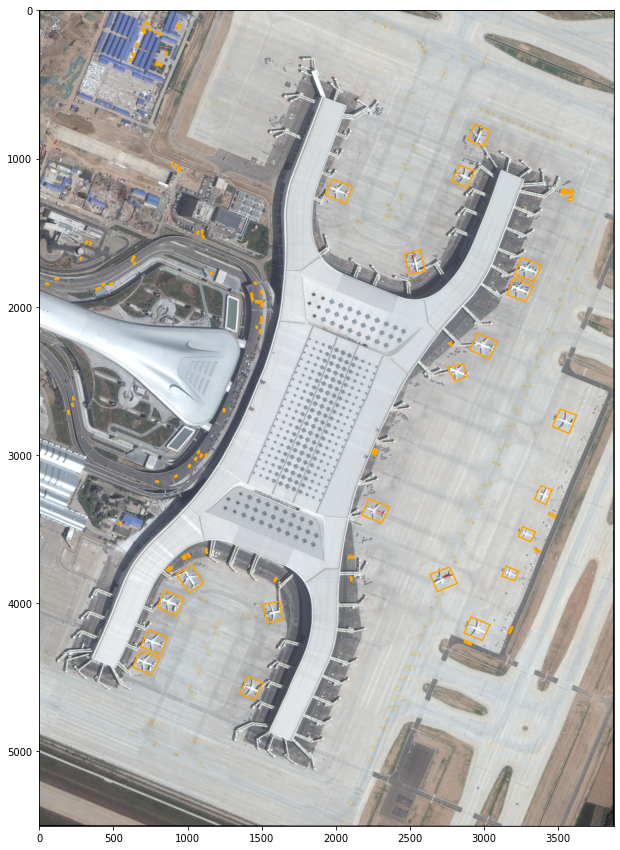

In [ ]:
fig0,ax0 = plt.subplots(figsize=(15,15))
for index,row in df.iterrows():
  x = [row['x0'],row['x1'],row['x2'],row['x3'],row['x0']]
  y = [row['y0'],row['y1'],row['y2'],row['y3'],row['y0']]
  ax0.plot(x,y,'orange')
ax0.imshow(img)